# THE SPARKS FOUNDATION 
## DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP(GRIP JANUARY2022)

### TASK 6 - PREDICTION USING DECISION TREE ALGORITHM

#### DESCRIPTION: In this notebook we will develop a classification model trained on the popular iris dataset using the decision tree algorithm. After developing and fine tuning the model, we will visualize the tree to help our understanding of the model and then use the model developed to make predictions on previously unseen data.

### Author :  Bakare Abdullateef Opeyemi

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
from sklearn.metrics import multilabel_confusion_matrix, classification_report

In [2]:
# Loading the iris dataset
iris=datasets.load_iris()

In [3]:
#Getting a brief description of the data to be used(i.e the iris dataset)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [5]:
#Reading the Data
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Exploratory Data Analysis

In [6]:
#Checking the dimensions of the data
df.shape

(150, 4)

In [7]:
#Storing the target data( which consists of 3 different types of the iris plant) in a variable 'y'
y = iris.target 
y.shape

(150,)

In [8]:
#Checking the statistical description of the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Printing a concise summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
#checking for missing values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [11]:
#Checking the correlation between features in the dataset
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<h4> From this correlation table, we can make the following inferences;</h4>
<ul>
    <li> The sepal length has a very high correlation with petal length and petal width</li>
    <li> In the same vein, petal length is highly correlated with petal width</li>
</ul>
<p> A problem of multicollinearity arises here which might lead to a skewed or misleading result depending on the machine learning algorithm used to train the model. Thankfully, a decision tree algorithm is to be used in this notebook and these algorithms are immune to the problems that arise as a result of multicollinearity.</p>


<h3> Data Visualizations </h3>

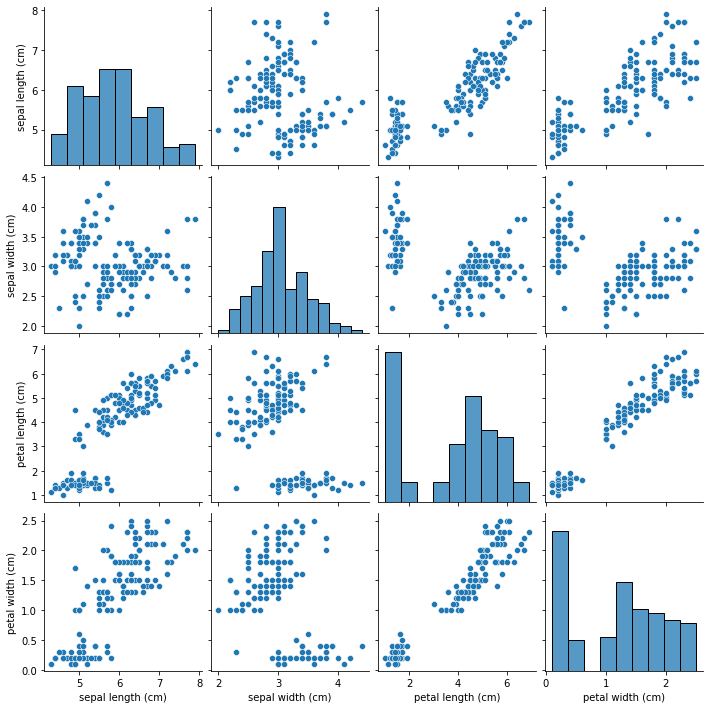

In [12]:
#Showing a quick view of relationships amaong features in the dataset
sns.pairplot(df)

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>

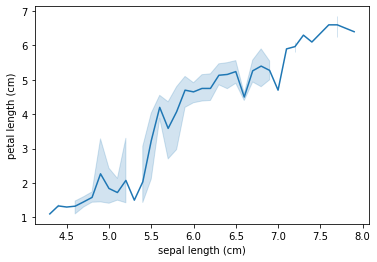

In [13]:
#Plotting the sepal length column against the petal length column
sns.lineplot(x= df['sepal length (cm)'],y= df['petal length (cm)'])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (cm)'>

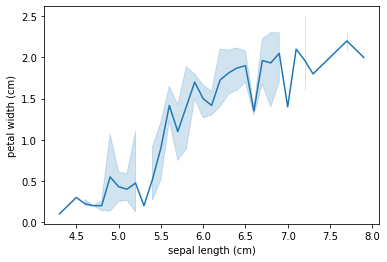

In [14]:
#Plotting the sepal length column against the petal width column
sns.lineplot(x= df['sepal length (cm)'],y= df['petal width (cm)'])

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

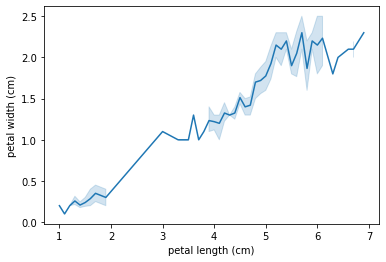

In [15]:
#Plotting the petal length column against the petal width column
sns.lineplot(x= df['petal length (cm)'],y= df['petal width (cm)'])

### Observations
<p> We can see that the relationship between the 'sepal length' and 'petal length' features, the 'sepal length' and 'petal width' features, and the 'petal length' and 'petal width' features is approximately a positively linear one</p>
<p> This corresponds with the inference made earlier from the correlation table. To visualize the correlation relationships further, the following heatmap of features is used</p>


<AxesSubplot:>

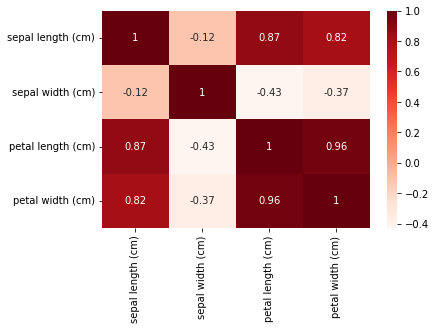

In [16]:
sns.heatmap(df.corr(),annot=True, cmap = 'Reds')

## Data Preprocessing

In [17]:
#Importing necessary libraries for data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
y = iris.target

In [19]:
#Splitting the data into training,testing and validation sets
X_trainv,X_test,y_trainv,y_test = train_test_split(df,y, train_size=0.75, random_state=0)
X_train,X_val,y_train,y_val = train_test_split(X_trainv,y_trainv, train_size=0.7, random_state=1)

In [20]:
#Creating copies of the train, test and validation sets before standardizing
X_train1 = X_train.copy()
X_val1 = X_val.copy()
X_test1= X_test.copy()

In [21]:
#Getting the dimensions of each dataset
print(X_train.shape, X_val.shape, X_test.shape)

(78, 4) (34, 4) (38, 4)


In [22]:
#Standardizing the first data sets
scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train1)
X_val1 = scaler.transform(X_val1)
X_test1 = scaler.transform(X_test1)

In [23]:
#Getting the dimensions of each dataset after standardizing
print(X_train1.shape, X_val1.shape, X_test1.shape)

(78, 4) (34, 4) (38, 4)


#### Explanation
<p> Here we have created two sets of training, testing and validation data, standardizing the first set while leaving the second as is.</p>
<p> This is so that we can explore the effects of standardizing on the accuracy of the decision tree model </p>

## Model Construction

In [24]:
#Importing the required library
from sklearn.tree import DecisionTreeClassifier

In [25]:
#instantiating the classifier with no hyperparameter tuned and training the first model on standardized data
tree1 = DecisionTreeClassifier()
model1 =tree1.fit(X_train1,y_train)

In [26]:
#Getting the accuracy of the model on training, testing and validation sets
print(model1.score(X_train1,y_train))
print(model1.score(X_val1,y_val))
print(model1.score(X_test1,y_test))

1.0
0.8823529411764706
0.9736842105263158


In [28]:
#Using model1 to make predictions on new data and printing the classification report
y_pred1 = model1.predict(X_test1)
print(classification_report(
    y_test,
    y_pred1,
    output_dict=False,
    target_names=['setosa', 'versicolor','virginica']
))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        16
   virginica       1.00      0.89      0.94         9

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



In [31]:
#instantiating the classifier with no hyperparameter tuned and training the second model on unstandardized data
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model= tree.fit(X_train,y_train)
#Getting the accuracy of the model on training, testing and validation sets
print(model.score(X_train,y_train))
print(model.score(X_val,y_val))
print(model.score(X_test,y_test))

1.0
0.8823529411764706
1.0


In [32]:
#Using model trained on unstandardized data to make predictions on new data and printing the classification report
y_pred = model.predict(X_test)
print(classification_report(
    y_test,
    y_pred,
    output_dict=False,
    target_names=['setosa', 'versicolor','virginica']
))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



([<matplotlib.axis.YTick at 0x1e2c4800490>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

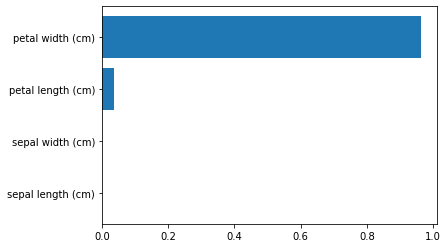

In [33]:
#Checking the most relevant features used in the second model
cols=list(df.columns)
plt.barh(range(4),model.feature_importances_,align='center')
plt.yticks(np.arange(4),labels=cols)


([<matplotlib.axis.YTick at 0x1e2c4862130>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

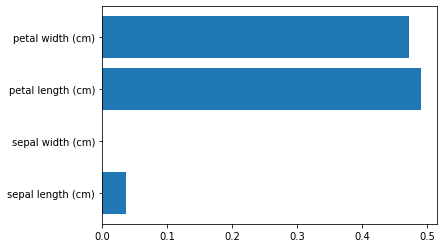

In [34]:
#Checking the most relevant features used in the first model
cols=list(df.columns)
plt.barh(range(4),model1.feature_importances_,align='center')
plt.yticks(np.arange(4),labels=cols)

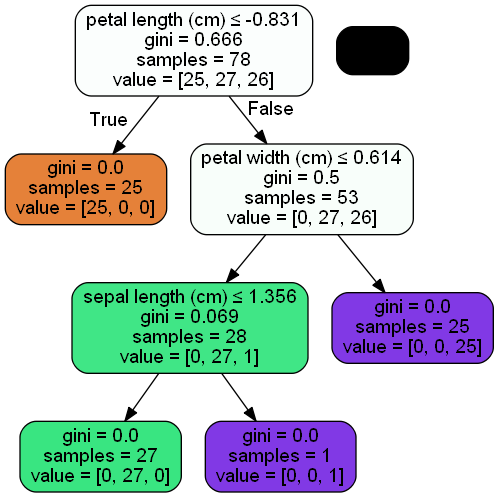

In [30]:
# Import necessary libraries for visualizing first tree model
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

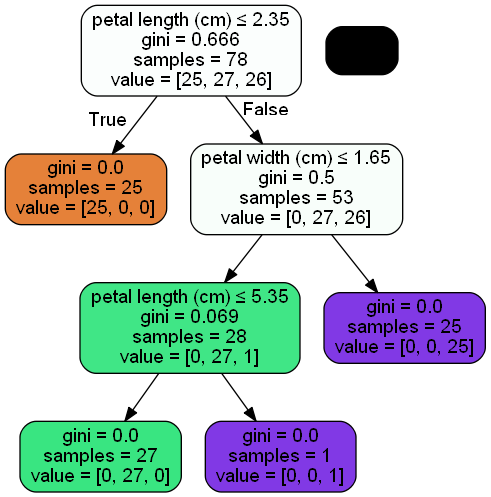

In [31]:
# Visualizing the second tree model
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, feature_names=iris.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Observations
<ul>
    <li>The tree model performed better on unstandardized data with an accuracy of 100% on unseen data as opposed to 97% when the model was trained on standardized data</li>
    <li>The depth of tree in both models is 3</li>
    <li>Both models make predictions using only two of the four features provided. This can have very serious consequences depending on the specific business application</li>
</ul>

## Model Evaluation/ Improvement
<p> In this section, we will attempt to improve the sophistication and performance of tree based models trained on the iris dataset</p>

In [33]:
#Importing the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Defining values to be tuned with the 'max_depth' and 'min_samples_leaf' hyperparameters of the decision tree classifier
param_grid = param_grid = { 'max_depth': [1,2,3],'min_samples_leaf': [1,2,3,4,5]}
#Instantiating grid search with the defined hyperparameters and cv of 5
grid_search = GridSearchCV(DecisionTreeClassifier(random_state= 0), param_grid, cv=5)

In [35]:
#Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(df,y, train_size=0.75, random_state=6)

In [36]:
#Tfitting the model and getting best parameters for the algorithm as well as average cross validation score
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1}
Best cross-validation score: 0.97


In [37]:
#Getting the accuracy of the model on unseen data
grid_search.score(X_test,y_test)

0.9210526315789473

In [38]:
#training and testing the decisionn tree algorithm with optimum hyperparameter values 
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 1, random_state= 0)
dtc.fit(X_train, y_train)
print("Training accuracy: {}".format(dtc.score(X_train,y_train)))
print("Testing accuracy: {:.2f}".format(dtc.score(X_test,y_test)))

Training accuracy: 0.9732142857142857
Testing accuracy: 0.92


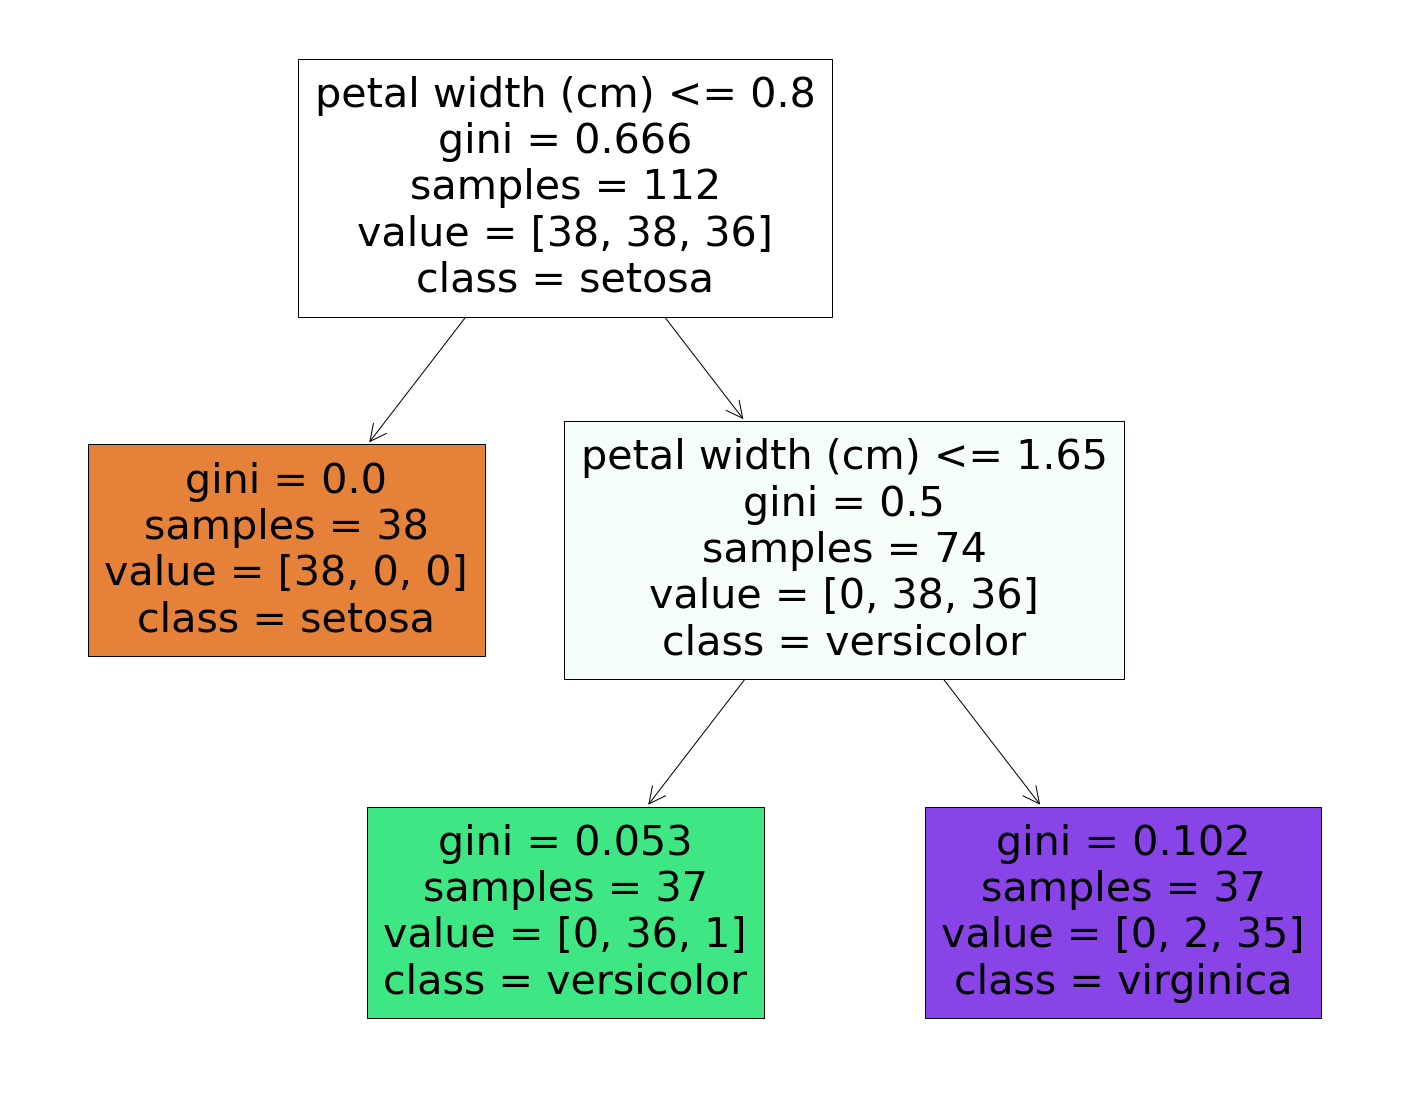

In [39]:
#Visualizing the model
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, feature_names=df.columns, class_names=['setosa', 'versicolor','virginica'], filled=True)

([<matplotlib.axis.YTick at 0x19336774040>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)')])

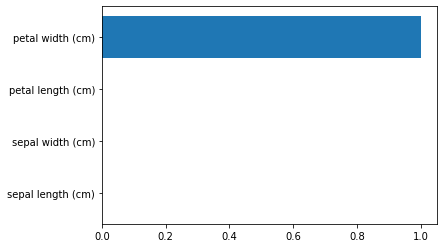

In [40]:
#Getting the most relevant features to the model
plt.barh(range(4),dtc.feature_importances_,align='center')
plt.yticks(np.arange(4),labels=cols)

### Observation
<p> We can see that although overfitting was reduced in the model with a validation score of 0.97 and a 92% accuracy on unseen data, the model is now making predictions based on only one feature.</p>
<p> This kind of model might not be sophisticated enough for many business applications as such, there is need to improve the sophistication of the model such that not one but multiple variables are responsible for its predictions</p>
<p>We will tackle this problem by using some feature engineering techniques</p>

In [41]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [43]:
#Creating new features by taking differences between existing feature values
df['sep_difference'] = df['sepal length (cm)']-df['sepal width (cm)']
df['pet_difference'] = df['petal length (cm)']-df['petal width (cm)']
df['Sepal_petal_length_diff'] = df['sepal length (cm)']-df['petal length (cm)']
df['Sepal_petal_width_diff'] = df['sepal width (cm)']-df['petal width (cm)']
df['Sepal_petal_len_wid_diff'] = df['sepal length (cm)']-df['petal width (cm)']
df['Sepal_petal_wid_len_diff'] = df['sepal width (cm)']-df['petal length (cm)']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sep_difference,pet_difference,Sepal_petal_length_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,5.1,3.5,1.4,0.2,1.6,1.2,3.7,3.3,4.9,2.1
1,4.9,3.0,1.4,0.2,1.9,1.2,3.5,2.8,4.7,1.6
2,4.7,3.2,1.3,0.2,1.5,1.1,3.4,3.0,4.5,1.9
3,4.6,3.1,1.5,0.2,1.5,1.3,3.1,2.9,4.4,1.6
4,5.0,3.6,1.4,0.2,1.4,1.2,3.6,3.4,4.8,2.2


In [44]:
#Getting new list of features
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'sep_difference', 'pet_difference',
       'Sepal_petal_length_diff', 'Sepal_petal_width_diff',
       'Sepal_petal_len_wid_diff', 'Sepal_petal_wid_len_diff'],
      dtype='object')

In [45]:
#Exploring the new data set
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sep_difference,pet_difference,Sepal_petal_length_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,2.786000,2.558667,2.085333,1.858000,4.644000,-0.700667
std,0.828066,0.435866,1.765298,0.762238,0.980072,1.051696,1.119527,1.007107,0.483899,1.991374
min,4.300000,2.000000,1.000000,0.100000,1.000000,0.800000,0.300000,0.300000,3.200000,-4.300000
25%,5.100000,2.800000,1.600000,0.300000,1.800000,1.300000,1.200000,1.025000,4.325000,-2.300000
50%,5.800000,3.000000,4.350000,1.300000,3.000000,2.900000,1.700000,1.500000,4.600000,-1.450000
75%,6.400000,3.300000,5.100000,1.800000,3.600000,3.300000,3.200000,2.900000,4.900000,1.600000
max,7.900000,4.400000,6.900000,2.500000,5.100000,4.700000,4.600000,4.000000,5.900000,2.900000


In [46]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sep_difference,pet_difference,Sepal_petal_length_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.897190,0.870441,-0.634946,-0.669949,0.422817,-0.798519
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.544064,-0.453790,0.588614,0.709896,0.375532,0.598678
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.927087,0.980669,-0.932026,-0.914178,-0.024928,-0.980248
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.853908,0.891424,-0.913274,-0.915315,-0.175508,-0.933690
sep_difference,0.897190,-0.544064,0.927087,0.853908,1.000000,0.937252,-0.798242,-0.881753,0.190229,-0.940921
pet_difference,0.870441,-0.453790,0.980669,0.891424,0.937252,1.000000,-0.902515,-0.871078,0.085361,-0.968660
Sepal_petal_length_diff,-0.634946,0.588614,-0.932026,-0.913274,-0.798242,-0.902515,1.000000,0.945966,0.352046,0.955050
Sepal_petal_width_diff,-0.669949,0.709896,-0.914178,-0.915315,-0.881753,-0.871078,0.945966,1.000000,0.295361,0.965774
Sepal_petal_len_wid_diff,0.422817,0.375532,-0.024928,-0.175508,0.190229,0.085361,0.352046,0.295361,1.000000,0.104293
Sepal_petal_wid_len_diff,-0.798519,0.598678,-0.980248,-0.933690,-0.940921,-0.968660,0.955050,0.965774,0.104293,1.000000


<AxesSubplot:>

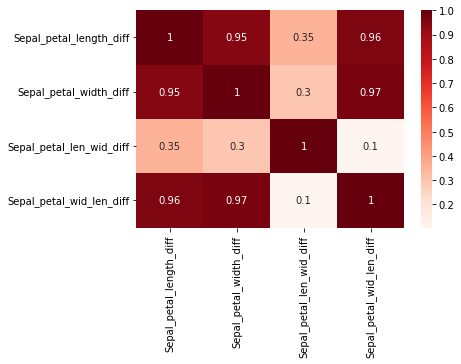

In [48]:
#Visualizing the correlations of 'Sepal_petal_length_diff', 'Sepal_petal_width_diff','Sepal_petal_len_wid_diff', 'Sepal_petal_wid_len_diff'
sns.heatmap(df[['Sepal_petal_length_diff', 'Sepal_petal_width_diff','Sepal_petal_len_wid_diff', 'Sepal_petal_wid_len_diff']].corr(),annot=True, cmap = 'Reds')

<AxesSubplot:>

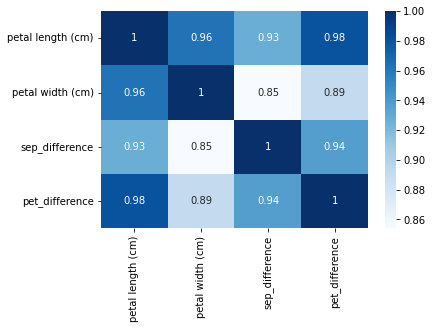

In [51]:
#Visualizing the correlations of 'petal length (cm)','petal width (cm)', 'sep_difference' and 'pet_difference'
sns.heatmap(df[['petal length (cm)','petal width (cm)',
                'sep_difference', 'pet_difference',]].corr(),annot=True, cmap = 'Blues')

<AxesSubplot:>

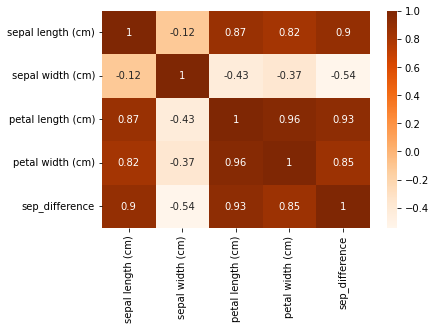

In [52]:
#Visualizing the correlations of 'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', 'sep_difference'
sns.heatmap(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'sep_difference',]].corr(),annot=True, cmap = 'Oranges')

### Model Reconstruction

In [68]:
#Importing the necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#Defining values to be tuned with the 'max_depth' and 'min_samples_leaf' hyperparameters of the decision tree classifier
param_grid =  { 'max_depth': [1,2,3],'min_samples_leaf': [1,2,3,4,5], 'min_samples_split':[2,3,4,5]}
#Instantiating grid search with the defined hyperparameters and cv of 5
grid_search = GridSearchCV(DecisionTreeClassifier(random_state= 4), param_grid, cv=3)
#Splitting the data into train and test set
X_train,X_test,y_train,y_test = train_test_split(df,y, train_size=0.75, random_state=7)
#Tfitting the model and getting best parameters for the algorithm as well as average cross validation score
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.97


In [70]:
X_train,X_test,y_train,y_test = train_test_split(df,y, train_size=0.75, random_state=89)

In [71]:
dec_tree = DecisionTreeClassifier(max_depth = 2, min_samples_leaf= 1, random_state = 10)
model = dec_tree.fit(X_train,y_train)
print("train_accuracy: {:.2f}".format(model.score(X_train, y_train)))
print("test_accuracy: {:.2f}".format(model.score(X_test, y_test)))

train_accuracy: 0.96
test_accuracy: 0.95


In [72]:
df.shape

(150, 10)

([<matplotlib.axis.YTick at 0x1933b3849d0>,
 [Text(0, 0, 'sepal length (cm)'),
  Text(0, 1, 'sepal width (cm)'),
  Text(0, 2, 'petal length (cm)'),
  Text(0, 3, 'petal width (cm)'),
  Text(0, 4, 'sep_difference'),
  Text(0, 5, 'pet_difference'),
  Text(0, 6, 'Sepal_petal_length_diff'),
  Text(0, 7, 'Sepal_petal_width_diff'),
  Text(0, 8, 'Sepal_petal_len_wid_diff'),
  Text(0, 9, 'Sepal_petal_wid_len_diff')])

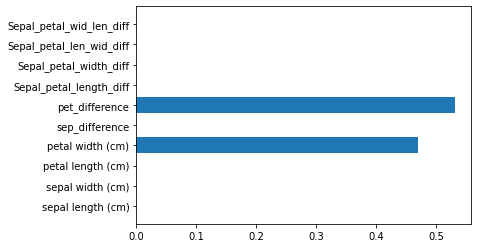

In [74]:
#Checking the most relevant features used in the model
cols=list(df.columns)
plt.barh(range(10),model.feature_importances_,align='center')
plt.yticks(np.arange(10),labels=cols)

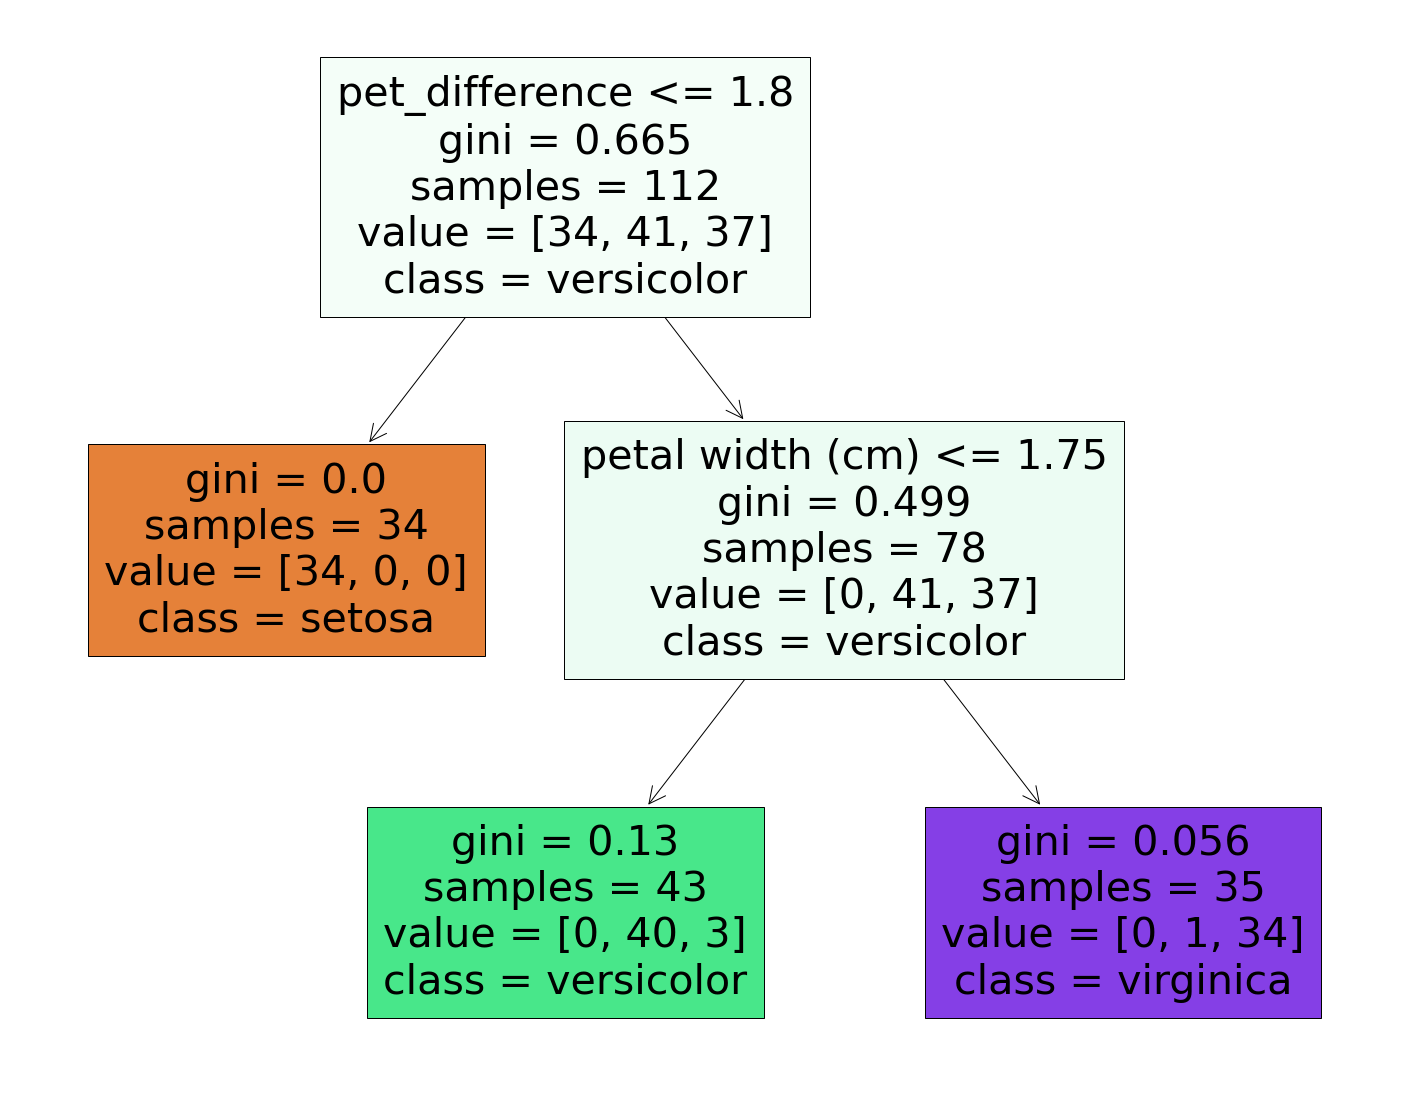

In [75]:
#Visualizing the model
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=df.columns, class_names=['setosa', 'versicolor','virginica'], filled=True)

In [83]:
#Constructing a confusion matrix for the model
from sklearn.metrics import multilabel_confusion_matrix, classification_report
#Making Predictions on previously unseen data
y_pred = model.predict(X_test)
multilabel_confusion_matrix(y_test, y_pred)

array([[[22,  0],
        [ 0, 16]],

       [[27,  2],
        [ 0,  9]],

       [[25,  0],
        [ 2, 11]]], dtype=int64)

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
#Printing Predictions
result = []
for item in y_pred:
    if item == 0:
        result.append('setosa')
    if item == 1:
        result.append('versicolor')
    if item == 2:
        result.append('virginica')
print(result)

['virginica', 'versicolor', 'setosa', 'virginica', 'setosa', 'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica', 'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor', 'setosa', 'versicolor']


In [85]:
print(classification_report(
    y_test,
    y_pred,
    output_dict=False,
    target_names=['setosa', 'versicolor','virginica']
))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.85      0.92        13

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.94        38
weighted avg       0.96      0.95      0.95        38



In [79]:
#Saving the model
import joblib
joblib.dump(model,'iris_tree_model.sav')

['iris_tree_model.sav']

# Conclusion
<ul>
<li>The model sophistication was improved as it now uses two features to make decisions one of which is an engineered feature</li>
<li>The most important characteristics for predicting the type of flower are the measurements of its Petals</li>
<li> The accuracy of the model was also improved from 92% to 95%</li>
<li> From the confusion matrix, we can see that the model predicts setosa most accurately, followed by virginica and then versicolor</li></ul>